In [1]:
# Import necessary libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Path to video  
video_path=r"C:\Users\Januka\Videos\3277598-Uhd 3840 2160 24Fps-1.m4v"
video = cv2.VideoCapture(video_path)

# read only the first frame for drawing a rectangle for the desired object
ret,frame = video.read()

# I am giving  big random numbers for x_min and y_min because if you initialize them as zeros whatever coordinate you go minimum will be zero 
x_min,y_min,x_max,y_max=36000,36000,0,0


def coordinat_chooser(event,x,y,flags,param):
    global go , x_min , y_min, x_max , y_max

    # when you click the right button, it will provide coordinates for variables
    if event==cv2.EVENT_RBUTTONDOWN:
        
        # if current coordinate of x lower than the x_min it will be new x_min , same rules apply for y_min 
        x_min=min(x,x_min) 
        y_min=min(y,y_min)

         # if current coordinate of x higher than the x_max it will be new x_max , same rules apply for y_max
        x_max=max(x,x_max)
        y_max=max(y,y_max)

        # draw rectangle
        cv2.rectangle(frame,(x_min,y_min),(x_max,y_max),(0,255,0),1)


    """
        if you didn't like your rectangle (maybe if you made some misscliks),  reset the coordinates with the middle button of your mouse
        if you press the middle button of your mouse coordinates will reset and you can give a new 2-point pair for your rectangle
    """
    if event==cv2.EVENT_MBUTTONDOWN:
        print("reset coordinate  data")
        x_min,y_min,x_max,y_max=36000,36000,0,0

cv2.namedWindow('coordinate_screen')
# Set mouse handler for the specified window, in this case, "coordinate_screen" window
cv2.setMouseCallback('coordinate_screen',coordinat_chooser)


while True:
    cv2.imshow("coordinate_screen",frame) # show only first frame 
    
    k = cv2.waitKey(5) & 0xFF # after drawing rectangle press ESC   
    if k == 27:
        cv2.destroyAllWindows()
        break

In [17]:
# take region of interest ( take inside of rectangle )
roi_image=frame[y_min:y_max,x_min:x_max]

# convert roi to grayscale, SIFT Algorithm works with grayscale images
roi_gray=cv2.cvtColor(roi_image,cv2.COLOR_BGR2GRAY)

In [18]:
# create SIFT algorithm object
sift = cv2.SIFT_create()

# find roi's keypoints and descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(roi_gray, None)

roi_keypoint_image=cv2.drawKeypoints(roi_gray,keypoints_1,roi_gray)

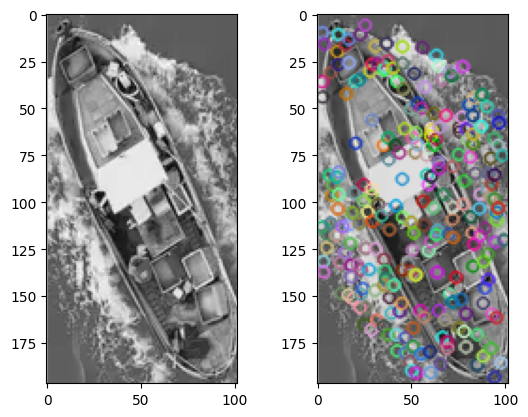

In [19]:
# visualize key points 
plt.subplot(121)
plt.imshow(roi_gray,cmap="gray")

plt.subplot(122)
plt.imshow(roi_keypoint_image,cmap="gray")

In [ ]:
# Path to the video  
video_path=r"C:\Users\Januka\Videos\3277598-Uhd 3840 2160 24Fps-1.m4v"
video = cv2.VideoCapture(video_path)

# matcher object
bf = cv2.BFMatcher()

while True :
    
    # reading video 
    ret,frame=video.read()
    
    # convert the frame to grayscale 
    frame_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    
    # find current frames keypoints and descriptors
    keypoints_2, descriptors_2 = sift.detectAndCompute(frame_gray, None)
    
    
    """
    Compare the key points/descriptors extracted from the 
    the first frame(from the target object) with those extracted from the current frame.
    """
    matches =bf.match(descriptors_1, descriptors_2)

 
    for match in matches:
        
         
        # .queryIdx and .trainIdx give index for key points
        
        # .queryIdx gives keypoint index from target image
        query_idx = match.queryIdx
        
        # .trainIdx gives keypoint index from current frame 
        train_idx = match.trainIdx
        
        # take coordinates that match
        pt1 = keypoints_1[query_idx].pt
        
        # current frame key points coordinates
        pt2 = keypoints_2[train_idx].pt
        
        # draw circle to pt2 coordinates , because pt2 gives current frame coordinates
        cv2.circle(frame,(int(pt2[0]),int(pt2[1])),2,(255,0,0),2)
    
        # show frame to screen
        cv2.imshow("coordinate_screen",frame) 
       
    
    k = cv2.waitKey(5) & 0xFF # after drawing rectangle press ESC   
    if k == 27:
        cv2.destroyAllWindows()
        break
          
cv2.destroyAllWindows()